In [1]:
!pip install 'zarr<3'
!pip install timm


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
# ALWAYS RUN THIS FIRST!
import os
import sys
from pathlib import Path

NOTEBOOK_DIR = Path("/rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest")
os.chdir(NOTEBOOK_DIR)
sys.path.insert(0, str(NOTEBOOK_DIR))

print(f"✅ Working directory: {os.getcwd()}")

✅ Working directory: /rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest


## Load consep

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import scipy.io as sio

# Dataset paths
consep_path = Path("/rsrch9/home/plm/idso_fa1_pathology/TIER1/yasin-vitaminp/public-datasets/CoNSeP")
test_path = consep_path / "Test"

# Get all image and label files
images_path = test_path / "Images"
labels_path = test_path / "Labels"

print("📥 Loading CoNSeP Test data...")

# Get sorted file lists
image_files = sorted(images_path.glob("*.png"))
label_files = sorted(labels_path.glob("*.mat"))

print(f"\n✅ Found files!")
print(f"  Number of images: {len(image_files)}")
print(f"  Number of label files: {len(label_files)}")

# Load a sample image and label to inspect structure
if image_files and label_files:
    sample_img = np.array(Image.open(image_files[0]))
    sample_label = sio.loadmat(str(label_files[0]))
    
    print(f"\n📐 Data structure:")
    print(f"  Image shape: {sample_img.shape} - dtype: {sample_img.dtype}")
    print(f"  Image value range: [{sample_img.min()}, {sample_img.max()}]")
    
    print(f"\n🏷️  Label .mat file keys:")
    for key in sample_label.keys():
        if not key.startswith('__'):
            print(f"    - {key}: {type(sample_label[key])}", end="")
            if isinstance(sample_label[key], np.ndarray):
                print(f" - shape: {sample_label[key].shape}")
            else:
                print()
    
    # CoNSeP typically has 'inst_map' (instance map) and 'type_map' (cell type map)
    if 'inst_map' in sample_label:
        inst_map = sample_label['inst_map']
        print(f"\n  Instance map shape: {inst_map.shape}")
        print(f"  Number of instances: {len(np.unique(inst_map)) - 1}")  # -1 for background
        print(f"  Instance IDs range: [{inst_map.min()}, {inst_map.max()}]")
    
    if 'type_map' in sample_label:
        type_map = sample_label['type_map']
        print(f"\n  Type map shape: {type_map.shape}")
        unique_types = np.unique(type_map)
        print(f"  Unique cell types: {unique_types}")
        print(f"\n🔬 Cell type distribution (sample image):")
        for cell_type in unique_types:
            if cell_type == 0:
                print(f"    Type {cell_type}: Background")
            else:
                count = np.sum(type_map == cell_type)
                print(f"    Type {cell_type}: {count} pixels")
    
    print(f"\n📝 CoNSeP cell type mapping:")
    print("    0: Background")
    print("    1: Inflammatory")
    print("    2: Epithelial") 
    print("    3: Spindle-shaped")
    print("    4: Neoplastic")

print(f"\n📂 File paths:")
print(f"  Images: {images_path}")
print(f"  Labels: {labels_path}")
print(f"  First image: {image_files[0].name if image_files else 'None'}")
print(f"  First label: {label_files[0].name if label_files else 'None'}")

📥 Loading CoNSeP Test data...

✅ Found files!
  Number of images: 14
  Number of label files: 14

📐 Data structure:
  Image shape: (1000, 1000, 3) - dtype: uint8
  Image value range: [0, 255]

🏷️  Label .mat file keys:
    - inst_map: <class 'numpy.ndarray'> - shape: (1000, 1000)
    - type_map: <class 'numpy.ndarray'> - shape: (1000, 1000)
    - inst_type: <class 'numpy.ndarray'> - shape: (865, 1)
    - inst_centroid: <class 'numpy.ndarray'> - shape: (865, 2)

  Instance map shape: (1000, 1000)
  Number of instances: 865
  Instance IDs range: [0.0, 865.0]

  Type map shape: (1000, 1000)
  Unique cell types: [0. 2. 4. 5.]

🔬 Cell type distribution (sample image):
    Type 0.0: Background
    Type 2.0: 13754 pixels
    Type 4.0: 74541 pixels
    Type 5.0: 125951 pixels

📝 CoNSeP cell type mapping:
    0: Background
    1: Inflammatory
    2: Epithelial
    3: Spindle-shaped
    4: Neoplastic

📂 File paths:
  Images: /rsrch9/home/plm/idso_fa1_pathology/TIER1/yasin-vitaminp/public-dataset

Building H&E Baseline encoder with DINOv2-large
✓ VitaminPBaselineHE initialized with large backbone
  Embed dim: 1024 | Decoder dims: [1024, 512, 256, 128]
🔍 Processing: test_1.png
  Image shape: (1000, 1000, 3)
  GT nuclei: 865
  Unique cell types: [0 2 4 5]


2026-01-20 17:42:17 - WSIPredictor - INFO - WSIPredictor initialized:
2026-01-20 17:42:17 - WSIPredictor - INFO -   Device: cuda
2026-01-20 17:42:17 - WSIPredictor - INFO -   Model type: VitaminPFlex (single-modality)
2026-01-20 17:42:17 - WSIPredictor - INFO -   Patch size: 512
2026-01-20 17:42:17 - WSIPredictor - INFO -   Overlap: 128
2026-01-20 17:42:17 - WSIPredictor - INFO -   Magnification: 40
2026-01-20 17:42:17 - WSIPredictor - INFO -    ⚠ No MPP in metadata, using default: 0.2500 μm/px
2026-01-20 17:42:17 - WSIPredictor - INFO - 🔍 Resolution matching:
2026-01-20 17:42:17 - WSIPredictor - INFO -    WSI MPP: 0.2500 μm/px
2026-01-20 17:42:17 - WSIPredictor - INFO -    Model training MPP: 0.2630 μm/px
2026-01-20 17:42:17 - WSIPredictor - INFO -    Scale factor: 0.95x
2026-01-20 17:42:17 - WSIPredictor - INFO -    Min area filter: 3.0 μm² = 48 pixels²
2026-01-20 17:42:17 - WSIPredictor - INFO - 📁 Opening H&E WSI: temp_consep/test_1.png
2026-01-20 17:42:17 - WSIPredictor - INFO -   


🔄 Running inference with WSIPredictor...
   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...


Processing tiles: 100%|██████████| 9/9 [00:01<00:00,  5.71it/s]
2026-01-20 17:42:19 - WSIPredictor - INFO -    ✓ Extracted 1212 instances from tiles (before cleaning)
2026-01-20 17:42:19 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:42:19 - WSIPredictor - INFO -    Found 649 edge cells to check for overlaps
2026-01-20 17:42:19 - WSIPredictor - INFO - Starting overlap cleaning with 1212 detections
2026-01-20 17:42:19 - WSIPredictor - INFO - Split detections: 0 mid, 1212 edge
2026-01-20 17:42:19 - WSIPredictor - INFO - Iteration 1: Found 702 overlaps, keeping 510/1212 detections
2026-01-20 17:42:19 - WSIPredictor - INFO - Iteration 2: Found 13 overlaps, keeping 497/510 detections
2026-01-20 17:42:19 - WSIPredictor - INFO - Iteration 3: Found 0 overlaps, keeping 497/497 detections
2026-01-20 17:42:19 - WSIPredictor - INFO - No more overlaps found, stopping early
2026-01-20 17:42:19 - WSIPredictor - INFO - Cleaning complete: 1212 -> 497 (715 r

✅ Detected 497 nuclei in 2.09s

📊 Computing metrics...

🔬 INSTANCE SEGMENTATION METRICS
  PQ (Panoptic Quality):     0.3781
  DQ (Detection Quality):    0.5301
  SQ (Segmentation Quality): 0.7132
  AJI (Agg. Jaccard Index):  0.4127


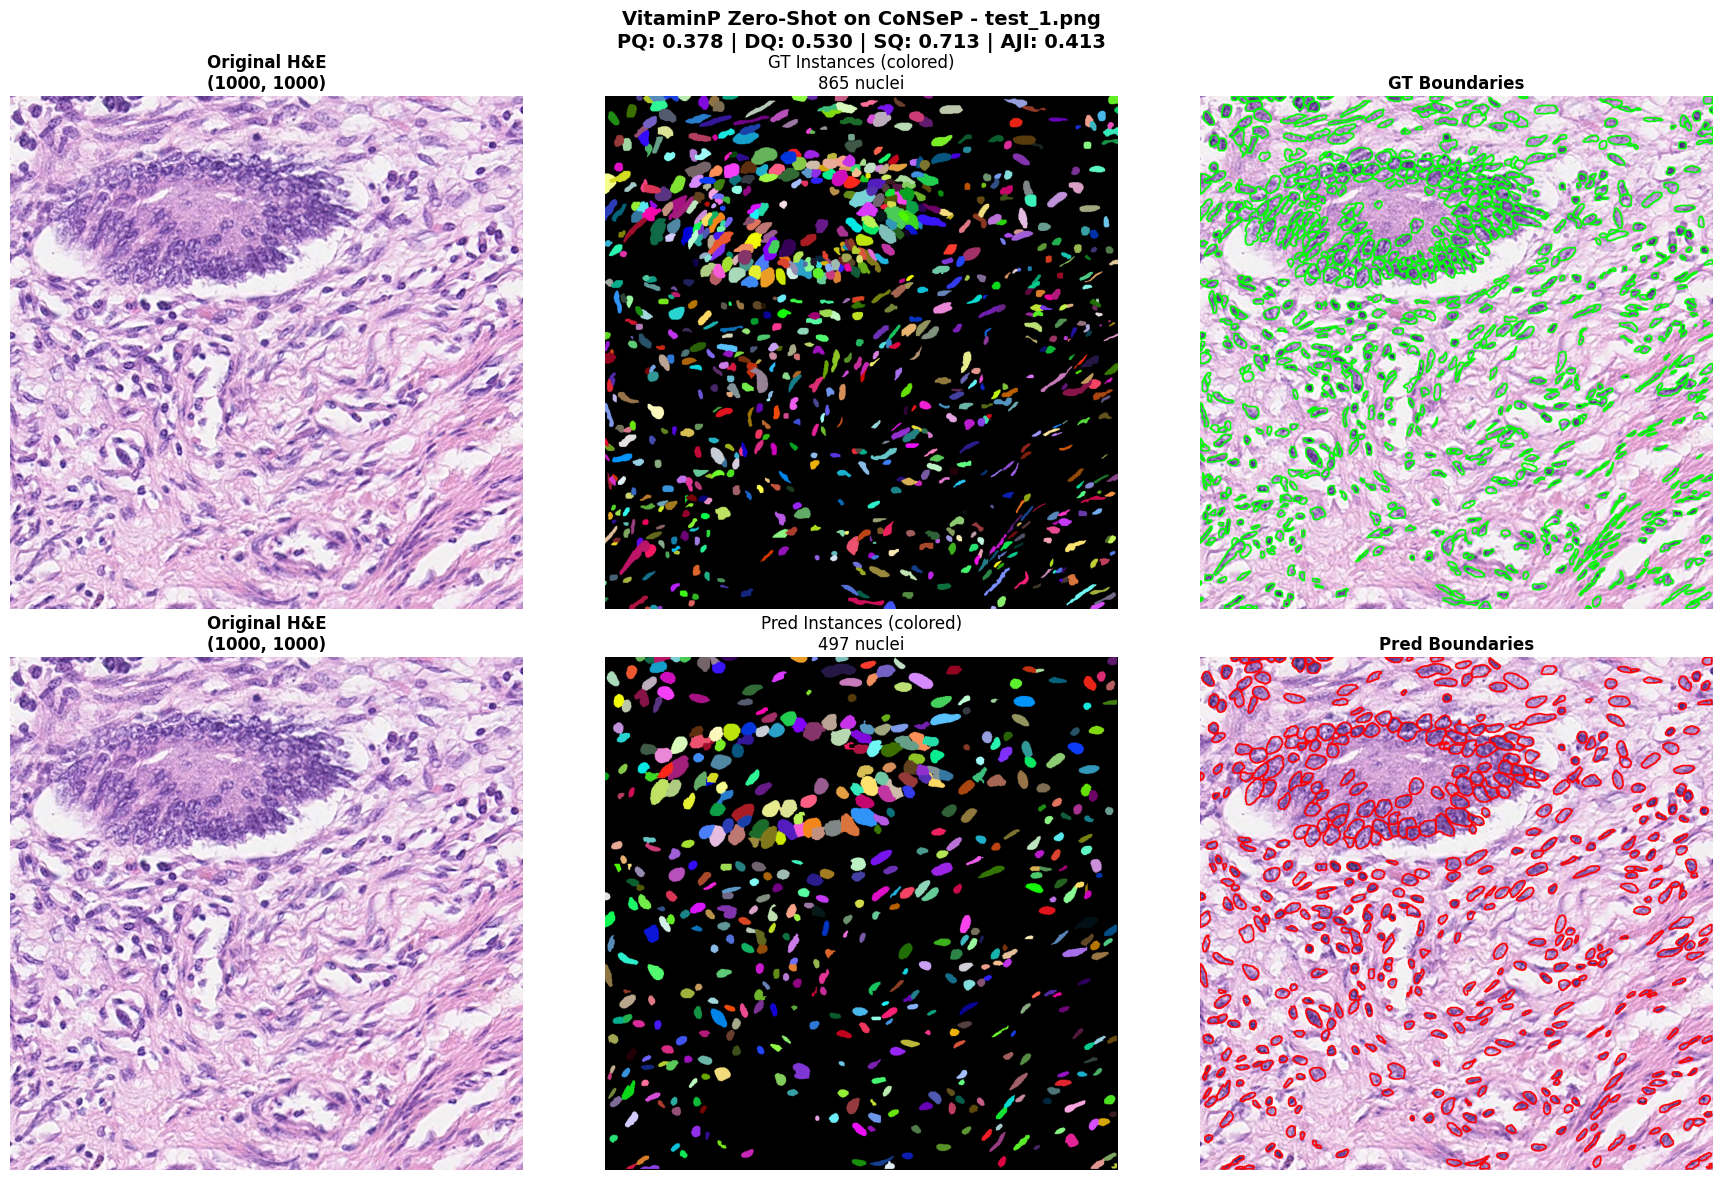


📊 Summary:
  GT: 865 nuclei
  Predicted: 497 nuclei
  Difference: -368 (-42.5%)

  Metrics:
  - Panoptic Quality (PQ): 0.3781
  - Detection Quality (DQ): 0.5301
  - Segmentation Quality (SQ): 0.7132
  - Aggregated Jaccard Index (AJI): 0.4127


In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import cv2
import scipy.io as sio
from vitaminp import VitaminPBaselineHE
from vitaminp.inference import WSIPredictor
from metrics import get_fast_pq, aggregated_jaccard_index

# Setup model
device = 'cuda'
model = VitaminPBaselineHE(model_size='large', dropout_rate=0.3, freeze_backbone=False)
model.load_state_dict(torch.load("checkpoints/vitamin_p_baselinehe_large_fold2_best.pth", map_location=device))
model = model.to(device)
model.eval()

# Load CoNSeP test data
consep_path = Path("/rsrch9/home/plm/idso_fa1_pathology/TIER1/yasin-vitaminp/public-datasets/CoNSeP")
test_path = consep_path / "Test"
images_path = test_path / "Images"
labels_path = test_path / "Labels"

# Get sorted file lists
image_files = sorted(images_path.glob("*.png"))
label_files = sorted(labels_path.glob("*.mat"))

# Load one random sample
if len(image_files) > 0:
    idx = np.random.randint(0, len(image_files))
    img_path = image_files[idx]
    label_path = label_files[idx]
    filename = img_path.name
    
    # Load image
    img = np.array(Image.open(img_path))
    
    # Load ground truth label
    label_data = sio.loadmat(str(label_path))
    gt_mask = label_data['inst_map'].astype(np.int32)
    gt_type_map = label_data['type_map'].astype(np.int32)
    
    print(f"🔍 Processing: {filename}")
    print(f"  Image shape: {img.shape}")
    print(f"  GT nuclei: {gt_mask.max()}")
    print(f"  Unique cell types: {np.unique(gt_type_map)}")
else:
    print("❌ No images loaded!")
    import sys
    sys.exit()

# Create temp directories
temp_dir = Path("temp_consep")
temp_output_dir = Path("temp_consep_output")
temp_dir.mkdir(exist_ok=True)
temp_output_dir.mkdir(exist_ok=True)

temp_img_path = temp_dir / filename
Image.fromarray(img.astype(np.uint8)).save(temp_img_path)

# Create predictor
predictor = WSIPredictor(
    model=model,
    device=device,
    patch_size=512,
    overlap=128,
    magnification=40
)

print("\n🔄 Running inference with WSIPredictor...")

# Run inference
results = predictor.predict(
    wsi_path=str(temp_img_path),
    output_dir=str(temp_output_dir),
    branch='he_nuclei',
    filter_tissue=False,
    clean_overlaps=True,
    save_geojson=False,
    save_json=False,
    save_csv=False,
    save_visualization=False,
    save_masks=False
)

print(f"✅ Detected {results['num_detections']} nuclei in {results['processing_time']:.2f}s")

# Extract instances dictionary
instances_dict = results['instances']

# Create instance map from the dictionary
h, w = img.shape[:2]
nuclei_inst = np.zeros((h, w), dtype=np.int32)

for inst_id, inst_info in instances_dict.items():
    if 'contour' in inst_info:
        contour = np.array(inst_info['contour'], dtype=np.int32)
        cv2.fillPoly(nuclei_inst, [contour], inst_id)
    elif 'coords' in inst_info:
        coords = np.array(inst_info['coords'], dtype=np.int32)
        cv2.fillPoly(nuclei_inst, [coords], inst_id)

num_nuclei = results['num_detections']
num_gt_nuclei = int(gt_mask.max())

# ========== COMPUTE METRICS ==========
print("\n📊 Computing metrics...")
try:
    pq, dq, sq = get_fast_pq(gt_mask, nuclei_inst)
    aji = aggregated_jaccard_index(gt_mask, nuclei_inst)
    
    print("\n" + "="*60)
    print("🔬 INSTANCE SEGMENTATION METRICS")
    print("="*60)
    print(f"  PQ (Panoptic Quality):     {pq:.4f}")
    print(f"  DQ (Detection Quality):    {dq:.4f}")
    print(f"  SQ (Segmentation Quality): {sq:.4f}")
    print(f"  AJI (Agg. Jaccard Index):  {aji:.4f}")
    print("="*60)
except Exception as e:
    print(f"⚠️ Error computing metrics: {str(e)}")
    pq, dq, sq, aji = 0, 0, 0, 0

# Visualization functions
def colorize_instances(inst_map):
    colored = np.zeros((*inst_map.shape, 3), dtype=np.uint8)
    unique_ids = np.unique(inst_map)
    np.random.seed(42)
    for inst_id in unique_ids:
        if inst_id == 0:
            continue
        colored[inst_map == inst_id] = np.random.randint(0, 255, 3)
    return colored

def draw_instance_boundaries(image, inst_map, color=(0, 255, 0), thickness=1):
    if image.max() <= 1.0:
        image = (image * 255).astype(np.uint8)
    else:
        image = image.astype(np.uint8)
    
    if len(image.shape) == 2:
        output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    else:
        output = image.copy()
    
    unique_ids = np.unique(inst_map)
    for inst_id in unique_ids:
        if inst_id == 0:
            continue
        mask = (inst_map == inst_id).astype(np.uint8)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(output, contours, -1, color, thickness)
    
    return output

# Visualize results
img_viz = img.astype(np.uint8)
gt_colored = colorize_instances(gt_mask)
pred_colored = colorize_instances(nuclei_inst)

gt_boundaries = draw_instance_boundaries(img_viz.copy(), gt_mask, color=(0, 255, 0), thickness=2)
pred_boundaries = draw_instance_boundaries(img_viz.copy(), nuclei_inst, color=(255, 0, 0), thickness=2)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Row 1: Ground Truth
axes[0, 0].imshow(img_viz)
axes[0, 0].set_title(f'Original H&E\n{img.shape[:2]}', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(gt_colored)
axes[0, 1].set_title(f'GT Instances (colored)\n{num_gt_nuclei} nuclei', fontsize=12)
axes[0, 1].axis('off')

axes[0, 2].imshow(gt_boundaries)
axes[0, 2].set_title(f'GT Boundaries', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')

# Row 2: Predictions
axes[1, 0].imshow(img_viz)
axes[1, 0].set_title(f'Original H&E\n{img.shape[:2]}', fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(pred_colored)
axes[1, 1].set_title(f'Pred Instances (colored)\n{num_nuclei} nuclei', fontsize=12)
axes[1, 1].axis('off')

axes[1, 2].imshow(pred_boundaries)
axes[1, 2].set_title(f'Pred Boundaries', fontsize=12, fontweight='bold')
axes[1, 2].axis('off')

# Add metrics as suptitle
plt.suptitle(f'VitaminP Zero-Shot on CoNSeP - {filename}\n'
             f'PQ: {pq:.3f} | DQ: {dq:.3f} | SQ: {sq:.3f} | AJI: {aji:.3f}', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n📊 Summary:")
print(f"  GT: {num_gt_nuclei} nuclei")
print(f"  Predicted: {num_nuclei} nuclei")
print(f"  Difference: {num_nuclei - num_gt_nuclei} ({((num_nuclei - num_gt_nuclei) / num_gt_nuclei * 100):.1f}%)")
print(f"\n  Metrics:")
print(f"  - Panoptic Quality (PQ): {pq:.4f}")
print(f"  - Detection Quality (DQ): {dq:.4f}")
print(f"  - Segmentation Quality (SQ): {sq:.4f}")
print(f"  - Aggregated Jaccard Index (AJI): {aji:.4f}")

# Cleanup temp files
import shutil
shutil.rmtree(temp_dir)
shutil.rmtree(temp_output_dir)

## Run vitaminp Flex

In [4]:
import torch
import numpy as np
from pathlib import Path
from PIL import Image
import cv2
import scipy.io as sio
from vitaminp import VitaminPBaselineHE
from vitaminp.inference import WSIPredictor
from metrics import get_fast_pq, aggregated_jaccard_index
from tqdm import tqdm
from collections import defaultdict
import shutil

# Setup model
device = 'cuda'
print("📦 Loading model...")
model = VitaminPBaselineHE(model_size='large', dropout_rate=0.3, freeze_backbone=False)
model.load_state_dict(torch.load("checkpoints/vitamin_p_baselinehe_large_fold3_best.pth", map_location=device))
model = model.to(device)
model.eval()
print("✅ Model loaded")

# Load CoNSeP test data
consep_path = Path("/rsrch9/home/plm/idso_fa1_pathology/TIER1/yasin-vitaminp/public-datasets/CoNSeP")
test_path = consep_path / "Test"
images_path = test_path / "Images"
labels_path = test_path / "Labels"

# Get sorted file lists
image_files = sorted(images_path.glob("*.png"))
label_files = sorted(labels_path.glob("*.mat"))

print(f"\n🔍 Found {len(image_files)} images in CoNSeP test set")
print(f"🔍 Found {len(label_files)} label files")

if len(image_files) == 0:
    print("❌ No images loaded!")
    import sys
    sys.exit()

# Create temp directories
temp_dir = Path("temp_consep")
temp_output_dir = Path("temp_consep_output")
temp_dir.mkdir(exist_ok=True)
temp_output_dir.mkdir(exist_ok=True)

# Initialize metric storage
consep_metrics = {
    'pq': [],
    'dq': [],
    'sq': [],
    'aji': [],
    'gt_count': [],
    'pred_count': []
}

# Store per-sample results for detailed analysis
sample_results = []

print(f"\n🔄 Evaluating on CoNSeP test set ({len(image_files)} samples)...")
print("="*80)

skipped_samples = 0

for idx in tqdm(range(len(image_files)), desc="Processing samples"):
    try:
        # Load image and label
        img_path = image_files[idx]
        label_path = label_files[idx]
        filename = img_path.name
        
        # Load image
        img = np.array(Image.open(img_path))
        
        # Load ground truth label
        label_data = sio.loadmat(str(label_path))
        gt_inst_map = label_data['inst_map'].astype(np.int32)
        gt_type_map = label_data['type_map'].astype(np.int32)
        
        # Save temp image for predictor (use original file)
        temp_img_path = temp_dir / filename
        shutil.copy(img_path, temp_img_path)
        
        # Create predictor
        predictor = WSIPredictor(
            model=model,
            device=device,
            patch_size=512,
            overlap=128,
            magnification=40
        )
        
        # Run inference
        results = predictor.predict(
            wsi_path=str(temp_img_path),
            output_dir=str(temp_output_dir),
            branch='he_nuclei',
            filter_tissue=False,
            clean_overlaps=True,
            save_geojson=False,
            save_json=False,
            save_csv=False,
            save_visualization=False,
            save_masks=False
        )
        
        # Extract instances dictionary
        instances_dict = results['instances']
        
        # Create instance map from the dictionary
        h, w = img.shape[:2]
        nuclei_inst = np.zeros((h, w), dtype=np.int32)
        
        for inst_id, inst_info in instances_dict.items():
            if 'contour' in inst_info:
                contour = np.array(inst_info['contour'], dtype=np.int32)
                cv2.fillPoly(nuclei_inst, [contour], inst_id)
            elif 'coords' in inst_info:
                coords = np.array(inst_info['coords'], dtype=np.int32)
                cv2.fillPoly(nuclei_inst, [coords], inst_id)
        
        # Compute metrics
        pq, dq, sq = get_fast_pq(gt_inst_map, nuclei_inst)
        aji = aggregated_jaccard_index(gt_inst_map, nuclei_inst)
        
        num_gt = int(gt_inst_map.max())
        num_pred = results['num_detections']
        
        # Store metrics
        consep_metrics['pq'].append(pq)
        consep_metrics['dq'].append(dq)
        consep_metrics['sq'].append(sq)
        consep_metrics['aji'].append(aji)
        consep_metrics['gt_count'].append(num_gt)
        consep_metrics['pred_count'].append(num_pred)
        
        # Store detailed sample results
        sample_results.append({
            'filename': filename,
            'pq': pq,
            'dq': dq,
            'sq': sq,
            'aji': aji,
            'gt_count': num_gt,
            'pred_count': num_pred
        })
        
        # Cleanup sample temp files
        temp_img_path.unlink()
        
    except Exception as e:
        print(f"\n⚠️ Skipping sample {idx} ({image_files[idx].name}) due to error: {str(e)[:100]}")
        import traceback
        traceback.print_exc()
        skipped_samples += 1
        continue

# Cleanup temp directories
shutil.rmtree(temp_dir, ignore_errors=True)
shutil.rmtree(temp_output_dir, ignore_errors=True)

# ========== OVERALL RESULTS ==========
print("\n" + "="*80)
print("📊 CONSEP TEST SET RESULTS - ZERO-SHOT EVALUATION")
print("="*80)

print(f"\nTotal samples processed: {len(consep_metrics['pq'])}/{len(image_files)}")
if skipped_samples > 0:
    print(f"⚠️ Skipped samples: {skipped_samples}")

print("\n🔬 NUCLEI INSTANCE METRICS (all samples):")
print(f"  PQ (Panoptic Quality):     {np.mean(consep_metrics['pq']):.4f} ± {np.std(consep_metrics['pq']):.4f}")
print(f"  DQ (Detection Quality):    {np.mean(consep_metrics['dq']):.4f} ± {np.std(consep_metrics['dq']):.4f}")
print(f"  SQ (Segmentation Quality): {np.mean(consep_metrics['sq']):.4f} ± {np.std(consep_metrics['sq']):.4f}")
print(f"  AJI (Agg. Jaccard Index):  {np.mean(consep_metrics['aji']):.4f} ± {np.std(consep_metrics['aji']):.4f}")

print("\n📈 DETECTION STATISTICS:")
total_gt = sum(consep_metrics['gt_count'])
total_pred = sum(consep_metrics['pred_count'])
print(f"  Total GT nuclei:       {total_gt}")
print(f"  Total Pred nuclei:     {total_pred}")
print(f"  Average GT per image:  {np.mean(consep_metrics['gt_count']):.1f} ± {np.std(consep_metrics['gt_count']):.1f}")
print(f"  Average Pred per image: {np.mean(consep_metrics['pred_count']):.1f} ± {np.std(consep_metrics['pred_count']):.1f}")
print(f"  Detection ratio:       {total_pred/total_gt:.3f}")

# ========== TOP/BOTTOM PERFORMERS ==========
print("\n" + "="*80)
print("🏆 TOP 5 SAMPLES (by PQ)")
print("="*80)

sorted_by_pq = sorted(sample_results, key=lambda x: x['pq'], reverse=True)
print(f"{'Rank':<6} {'Filename':<40} {'PQ':>8} {'DQ':>8} {'SQ':>8} {'AJI':>8}")
print("-" * 80)
for i, result in enumerate(sorted_by_pq[:5], 1):
    print(f"{i:<6} {result['filename']:<40} {result['pq']:>8.4f} {result['dq']:>8.4f} "
          f"{result['sq']:>8.4f} {result['aji']:>8.4f}")

print("\n" + "="*80)
print("⚠️  BOTTOM 5 SAMPLES (by PQ)")
print("="*80)
print(f"{'Rank':<6} {'Filename':<40} {'PQ':>8} {'DQ':>8} {'SQ':>8} {'AJI':>8}")
print("-" * 80)
for i, result in enumerate(sorted_by_pq[-5:], 1):
    print(f"{i:<6} {result['filename']:<40} {result['pq']:>8.4f} {result['dq']:>8.4f} "
          f"{result['sq']:>8.4f} {result['aji']:>8.4f}")

# ========== PER-SAMPLE DETAILED RESULTS ==========
print("\n" + "="*80)
print("📋 DETAILED PER-SAMPLE RESULTS")
print("="*80)
print(f"{'Filename':<40} {'GT':>6} {'Pred':>6} {'PQ':>8} {'DQ':>8} {'SQ':>8} {'AJI':>8}")
print("-" * 80)
for result in sorted(sample_results, key=lambda x: x['filename']):
    print(f"{result['filename']:<40} {result['gt_count']:>6} {result['pred_count']:>6} "
          f"{result['pq']:>8.4f} {result['dq']:>8.4f} {result['sq']:>8.4f} {result['aji']:>8.4f}")

print("\n" + "="*80)
print("✅ CoNSeP evaluation complete!")
print("="*80)

/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📦 Loading model...
Building H&E Baseline encoder with DINOv2-large
✓ VitaminPBaselineHE initialized with large backbone
  Embed dim: 1024 | Decoder dims: [1024, 512, 256, 128]
✅ Model loaded

🔍 Found 14 images in CoNSeP test set
🔍 Found 14 label files

🔄 Evaluating on CoNSeP test set (14 samples)...


Processing samples:   0%|          | 0/14 [00:00<?, ?it/s]2026-01-20 17:30:33 - WSIPredictor - INFO - WSIPredictor initialized:
2026-01-20 17:30:33 - WSIPredictor - INFO -   Device: cuda
2026-01-20 17:30:33 - WSIPredictor - INFO -   Model type: VitaminPFlex (single-modality)
2026-01-20 17:30:33 - WSIPredictor - INFO -   Patch size: 512
2026-01-20 17:30:33 - WSIPredictor - INFO -   Overlap: 128
2026-01-20 17:30:33 - WSIPredictor - INFO -   Magnification: 40
2026-01-20 17:30:33 - WSIPredictor - INFO -    ⚠ No MPP in metadata, using default: 0.2500 μm/px
2026-01-20 17:30:33 - WSIPredictor - INFO - 🔍 Resolution matching:
2026-01-20 17:30:33 - WSIPredictor - INFO -    WSI MPP: 0.2500 μm/px
2026-01-20 17:30:33 - WSIPredictor - INFO -    Model training MPP: 0.2630 μm/px
2026-01-20 17:30:33 - WSIPredictor - INFO -    Scale factor: 0.95x
2026-01-20 17:30:33 - WSIPredictor - INFO -    Min area filter: 3.0 μm² = 48 pixels²
2026-01-20 17:30:33 - WSIPredictor - INFO - 📁 Opening H&E WSI: temp_consep

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:04<00:00,  2.15it/s]
2026-01-20 17:30:37 - WSIPredictor - INFO -    ✓ Extracted 1431 instances from tiles (before cleaning)
2026-01-20 17:30:37 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:30:37 - WSIPredictor - INFO -    Found 774 edge cells to check for overlaps
2026-01-20 17:30:37 - WSIPredictor - INFO - Starting overlap cleaning with 1431 detections
2026-01-20 17:30:37 - WSIPredictor - INFO - Split detections: 0 mid, 1431 edge
2026-01-20 17:30:38 - WSIPredictor - INFO - Iteration 1: Found 841 overlaps, keeping 590/1431 detections
2026-01-20 17:30:38 - WSIPredictor - INFO - Iteration 2: Found 16 overlaps, keeping 574/590 detections
2026-01-20 17:30:38 - WSIPredictor - INFO - Iteration 3: Found 0 overlaps, keeping 574/574 detections
2026-01-20 17:30:38 - WSIPredictor - INFO - No more overlaps found, stopping early
2026-01-20 17:30:38 - WSIPredictor - INFO - Cleaning complete: 1431 -> 574 (857 

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]
2026-01-20 17:30:56 - WSIPredictor - INFO -    ✓ Extracted 1713 instances from tiles (before cleaning)
2026-01-20 17:30:56 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:30:56 - WSIPredictor - INFO -    Found 1049 edge cells to check for overlaps
2026-01-20 17:30:56 - WSIPredictor - INFO - Starting overlap cleaning with 1713 detections
2026-01-20 17:30:56 - WSIPredictor - INFO - Split detections: 0 mid, 1713 edge
2026-01-20 17:30:57 - WSIPredictor - INFO - Iteration 1: Found 989 overlaps, keeping 724/1713 detections
2026-01-20 17:30:57 - WSIPredictor - INFO - Iteration 2: Found 16 overlaps, keeping 708/724 detections
2026-01-20 17:30:57 - WSIPredictor - INFO - Iteration 3: Found 0 overlaps, keeping 708/708 detections
2026-01-20 17:30:57 - WSIPredictor - INFO - No more overlaps found, stopping early
2026-01-20 17:30:57 - WSIPredictor - INFO - Cleaning complete: 1713 -> 708 (100

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:02<00:00,  4.19it/s]
2026-01-20 17:31:12 - WSIPredictor - INFO -    ✓ Extracted 1296 instances from tiles (before cleaning)
2026-01-20 17:31:13 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:31:13 - WSIPredictor - INFO -    Found 667 edge cells to check for overlaps
2026-01-20 17:31:13 - WSIPredictor - INFO - Starting overlap cleaning with 1296 detections
2026-01-20 17:31:13 - WSIPredictor - INFO - Split detections: 0 mid, 1296 edge
2026-01-20 17:31:13 - WSIPredictor - INFO - Iteration 1: Found 743 overlaps, keeping 553/1296 detections
2026-01-20 17:31:13 - WSIPredictor - INFO - Iteration 2: Found 19 overlaps, keeping 534/553 detections
2026-01-20 17:31:13 - WSIPredictor - INFO - Iteration 3: Found 2 overlaps, keeping 532/534 detections
2026-01-20 17:31:13 - WSIPredictor - INFO - Iteration 4: Found 0 overlaps, keeping 532/532 detections
2026-01-20 17:31:13 - WSIPredictor - INFO - No more overlaps 

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
2026-01-20 17:31:31 - WSIPredictor - INFO -    ✓ Extracted 685 instances from tiles (before cleaning)
2026-01-20 17:31:31 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:31:31 - WSIPredictor - INFO -    Found 411 edge cells to check for overlaps
2026-01-20 17:31:32 - WSIPredictor - INFO - Starting overlap cleaning with 685 detections
2026-01-20 17:31:32 - WSIPredictor - INFO - Split detections: 0 mid, 685 edge
2026-01-20 17:31:32 - WSIPredictor - INFO - Iteration 1: Found 382 overlaps, keeping 303/685 detections
2026-01-20 17:31:32 - WSIPredictor - INFO - Iteration 2: Found 8 overlaps, keeping 295/303 detections
2026-01-20 17:31:32 - WSIPredictor - INFO - Iteration 3: Found 0 overlaps, keeping 295/295 detections
2026-01-20 17:31:32 - WSIPredictor - INFO - No more overlaps found, stopping early
2026-01-20 17:31:32 - WSIPredictor - INFO - Cleaning complete: 685 -> 295 (390 remove

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]
2026-01-20 17:31:44 - WSIPredictor - INFO -    ✓ Extracted 2808 instances from tiles (before cleaning)
2026-01-20 17:31:44 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:31:44 - WSIPredictor - INFO -    Found 1421 edge cells to check for overlaps
2026-01-20 17:31:44 - WSIPredictor - INFO - Starting overlap cleaning with 2808 detections
2026-01-20 17:31:44 - WSIPredictor - INFO - Split detections: 0 mid, 2808 edge
2026-01-20 17:31:45 - WSIPredictor - INFO - Iteration 1: Found 1909 overlaps, keeping 899/2808 detections
2026-01-20 17:31:45 - WSIPredictor - INFO - Iteration 2: Found 13 overlaps, keeping 886/899 detections
2026-01-20 17:31:45 - WSIPredictor - INFO - Iteration 3: Found 1 overlaps, keeping 885/886 detections
2026-01-20 17:31:45 - WSIPredictor - INFO - Iteration 4: Found 0 overlaps, keeping 885/885 detections
2026-01-20 17:31:45 - WSIPredictor - INFO - No more overlap

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:03<00:00,  2.36it/s]
2026-01-20 17:32:08 - WSIPredictor - INFO -    ✓ Extracted 1467 instances from tiles (before cleaning)
2026-01-20 17:32:08 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:32:08 - WSIPredictor - INFO -    Found 791 edge cells to check for overlaps
2026-01-20 17:32:08 - WSIPredictor - INFO - Starting overlap cleaning with 1467 detections
2026-01-20 17:32:08 - WSIPredictor - INFO - Split detections: 0 mid, 1467 edge
2026-01-20 17:32:08 - WSIPredictor - INFO - Iteration 1: Found 861 overlaps, keeping 606/1467 detections
2026-01-20 17:32:08 - WSIPredictor - INFO - Iteration 2: Found 24 overlaps, keeping 582/606 detections
2026-01-20 17:32:08 - WSIPredictor - INFO - Iteration 3: Found 0 overlaps, keeping 582/582 detections
2026-01-20 17:32:08 - WSIPredictor - INFO - No more overlaps found, stopping early
2026-01-20 17:32:08 - WSIPredictor - INFO - Cleaning complete: 1467 -> 582 (885 

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]
2026-01-20 17:32:19 - WSIPredictor - INFO -    ✓ Extracted 379 instances from tiles (before cleaning)
2026-01-20 17:32:19 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:32:19 - WSIPredictor - INFO -    Found 240 edge cells to check for overlaps
2026-01-20 17:32:19 - WSIPredictor - INFO - Starting overlap cleaning with 379 detections
2026-01-20 17:32:19 - WSIPredictor - INFO - Split detections: 0 mid, 379 edge
2026-01-20 17:32:19 - WSIPredictor - INFO - Iteration 1: Found 193 overlaps, keeping 186/379 detections
2026-01-20 17:32:19 - WSIPredictor - INFO - Iteration 2: Found 6 overlaps, keeping 180/186 detections
2026-01-20 17:32:19 - WSIPredictor - INFO - Iteration 3: Found 0 overlaps, keeping 180/180 detections
2026-01-20 17:32:19 - WSIPredictor - INFO - No more overlaps found, stopping early
2026-01-20 17:32:19 - WSIPredictor - INFO - Cleaning complete: 379 -> 180 (199 remove

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
2026-01-20 17:32:25 - WSIPredictor - INFO -    ✓ Extracted 652 instances from tiles (before cleaning)
2026-01-20 17:32:25 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:32:25 - WSIPredictor - INFO -    Found 374 edge cells to check for overlaps
2026-01-20 17:32:25 - WSIPredictor - INFO - Starting overlap cleaning with 652 detections
2026-01-20 17:32:25 - WSIPredictor - INFO - Split detections: 0 mid, 652 edge
2026-01-20 17:32:25 - WSIPredictor - INFO - Iteration 1: Found 368 overlaps, keeping 284/652 detections
2026-01-20 17:32:25 - WSIPredictor - INFO - Iteration 2: Found 6 overlaps, keeping 278/284 detections
2026-01-20 17:32:26 - WSIPredictor - INFO - Iteration 3: Found 0 overlaps, keeping 278/278 detections
2026-01-20 17:32:26 - WSIPredictor - INFO - No more overlaps found, stopping early
2026-01-20 17:32:26 - WSIPredictor - INFO - Cleaning complete: 652 -> 278 (374 remove

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:01<00:00,  4.53it/s]
2026-01-20 17:32:33 - WSIPredictor - INFO -    ✓ Extracted 968 instances from tiles (before cleaning)
2026-01-20 17:32:33 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:32:33 - WSIPredictor - INFO -    Found 574 edge cells to check for overlaps
2026-01-20 17:32:34 - WSIPredictor - INFO - Starting overlap cleaning with 968 detections
2026-01-20 17:32:34 - WSIPredictor - INFO - Split detections: 0 mid, 968 edge
2026-01-20 17:32:34 - WSIPredictor - INFO - Iteration 1: Found 607 overlaps, keeping 361/968 detections
2026-01-20 17:32:34 - WSIPredictor - INFO - Iteration 2: Found 19 overlaps, keeping 342/361 detections
2026-01-20 17:32:34 - WSIPredictor - INFO - Iteration 3: Found 1 overlaps, keeping 341/342 detections
2026-01-20 17:32:34 - WSIPredictor - INFO - Iteration 4: Found 0 overlaps, keeping 341/341 detections
2026-01-20 17:32:34 - WSIPredictor - INFO - No more overlaps foun

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]
2026-01-20 17:32:45 - WSIPredictor - INFO -    ✓ Extracted 1496 instances from tiles (before cleaning)
2026-01-20 17:32:45 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:32:45 - WSIPredictor - INFO -    Found 862 edge cells to check for overlaps
2026-01-20 17:32:45 - WSIPredictor - INFO - Starting overlap cleaning with 1496 detections
2026-01-20 17:32:45 - WSIPredictor - INFO - Split detections: 0 mid, 1496 edge
2026-01-20 17:32:46 - WSIPredictor - INFO - Iteration 1: Found 894 overlaps, keeping 602/1496 detections
2026-01-20 17:32:46 - WSIPredictor - INFO - Iteration 2: Found 13 overlaps, keeping 589/602 detections
2026-01-20 17:32:46 - WSIPredictor - INFO - Iteration 3: Found 1 overlaps, keeping 588/589 detections
2026-01-20 17:32:46 - WSIPredictor - INFO - Iteration 4: Found 0 overlaps, keeping 588/588 detections
2026-01-20 17:32:46 - WSIPredictor - INFO - No more overlaps 

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:02<00:00,  3.07it/s]
2026-01-20 17:33:03 - WSIPredictor - INFO -    ✓ Extracted 639 instances from tiles (before cleaning)
2026-01-20 17:33:03 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:33:03 - WSIPredictor - INFO -    Found 386 edge cells to check for overlaps
2026-01-20 17:33:03 - WSIPredictor - INFO - Starting overlap cleaning with 639 detections
2026-01-20 17:33:03 - WSIPredictor - INFO - Split detections: 0 mid, 639 edge
2026-01-20 17:33:03 - WSIPredictor - INFO - Iteration 1: Found 376 overlaps, keeping 263/639 detections
2026-01-20 17:33:03 - WSIPredictor - INFO - Iteration 2: Found 11 overlaps, keeping 252/263 detections
2026-01-20 17:33:03 - WSIPredictor - INFO - Iteration 3: Found 1 overlaps, keeping 251/252 detections
2026-01-20 17:33:03 - WSIPredictor - INFO - Iteration 4: Found 0 overlaps, keeping 251/251 detections
2026-01-20 17:33:03 - WSIPredictor - INFO - No more overlaps foun

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:01<00:00,  4.89it/s]
2026-01-20 17:33:10 - WSIPredictor - INFO -    ✓ Extracted 231 instances from tiles (before cleaning)
2026-01-20 17:33:10 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:33:10 - WSIPredictor - INFO -    Found 161 edge cells to check for overlaps
2026-01-20 17:33:10 - WSIPredictor - INFO - Starting overlap cleaning with 231 detections
2026-01-20 17:33:10 - WSIPredictor - INFO - Split detections: 0 mid, 231 edge
2026-01-20 17:33:10 - WSIPredictor - INFO - Iteration 1: Found 140 overlaps, keeping 91/231 detections
2026-01-20 17:33:10 - WSIPredictor - INFO - Iteration 2: Found 0 overlaps, keeping 91/91 detections
2026-01-20 17:33:10 - WSIPredictor - INFO - No more overlaps found, stopping early
2026-01-20 17:33:10 - WSIPredictor - INFO - Cleaning complete: 231 -> 91 (140 removed)
2026-01-20 17:33:10 - WSIPredictor - INFO -    ✓ After cleaning: 91 instances
2026-01-20 17:33:10 - WSI

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]
2026-01-20 17:33:15 - WSIPredictor - INFO -    ✓ Extracted 1339 instances from tiles (before cleaning)
2026-01-20 17:33:15 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:33:15 - WSIPredictor - INFO -    Found 761 edge cells to check for overlaps
2026-01-20 17:33:16 - WSIPredictor - INFO - Starting overlap cleaning with 1339 detections
2026-01-20 17:33:16 - WSIPredictor - INFO - Split detections: 0 mid, 1339 edge
2026-01-20 17:33:16 - WSIPredictor - INFO - Iteration 1: Found 787 overlaps, keeping 552/1339 detections
2026-01-20 17:33:17 - WSIPredictor - INFO - Iteration 2: Found 40 overlaps, keeping 512/552 detections
2026-01-20 17:33:17 - WSIPredictor - INFO - Iteration 3: Found 2 overlaps, keeping 510/512 detections
2026-01-20 17:33:17 - WSIPredictor - INFO - Iteration 4: Found 0 overlaps, keeping 510/510 detections
2026-01-20 17:33:17 - WSIPredictor - INFO - No more overlaps 

   Virtual upscaled size: 950x950 (from 1000x1000)
   Scanning 3x3 tile grid...



Processing tiles: 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]
2026-01-20 17:33:35 - WSIPredictor - INFO -    ✓ Extracted 776 instances from tiles (before cleaning)
2026-01-20 17:33:35 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-20 17:33:35 - WSIPredictor - INFO -    Found 523 edge cells to check for overlaps
2026-01-20 17:33:35 - WSIPredictor - INFO - Starting overlap cleaning with 776 detections
2026-01-20 17:33:35 - WSIPredictor - INFO - Split detections: 0 mid, 776 edge
2026-01-20 17:33:36 - WSIPredictor - INFO - Iteration 1: Found 485 overlaps, keeping 291/776 detections
2026-01-20 17:33:36 - WSIPredictor - INFO - Iteration 2: Found 6 overlaps, keeping 285/291 detections
2026-01-20 17:33:36 - WSIPredictor - INFO - Iteration 3: Found 0 overlaps, keeping 285/285 detections
2026-01-20 17:33:36 - WSIPredictor - INFO - No more overlaps found, stopping early
2026-01-20 17:33:36 - WSIPredictor - INFO - Cleaning complete: 776 -> 285 (491 remove


📊 CONSEP TEST SET RESULTS - ZERO-SHOT EVALUATION

Total samples processed: 14/14

🔬 NUCLEI INSTANCE METRICS (all samples):
  PQ (Panoptic Quality):     0.3970 ± 0.0765
  DQ (Detection Quality):    0.5530 ± 0.1002
  SQ (Segmentation Quality): 0.7166 ± 0.0204
  AJI (Agg. Jaccard Index):  0.4577 ± 0.0702

📈 DETECTION STATISTICS:
  Total GT nuclei:       8777
  Total Pred nuclei:     6100
  Average GT per image:  626.9 ± 325.1
  Average Pred per image: 435.7 ± 215.3
  Detection ratio:       0.695

🏆 TOP 5 SAMPLES (by PQ)
Rank   Filename                                       PQ       DQ       SQ      AJI
--------------------------------------------------------------------------------
1      test_14.png                                0.5563   0.7610   0.7311   0.6017
2      test_10.png                                0.4678   0.6504   0.7192   0.5252
3      test_3.png                                 0.4449   0.5893   0.7550   0.5124
4      test_13.png                                0.4438   